In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
max_poisson = 7

def poisson(n, lamb):
    value = (lamb**n) * np.exp(-lamb) / np.math.factorial(n)
    return value

In [7]:
def show(V, policy, V_title="", policy_title=""):
    f, ax = plt.subplots(1, 2, figsize=(10, 4))

    c1 = ax[0].imshow(V, cmap='hot', interpolation='nearest')
    ax[0].set_title(V_title)

    c2 = ax[1].imshow(policy, cmap='hot', interpolation='nearest', vmin=-5, vmax=5)
    ax[1].set_title(policy_title)

    f.colorbar(c1, ax=ax[0], orientation='vertical')
    f.colorbar(c2, ax=ax[1], orientation='vertical')
    
    plt.show()

In [8]:
def policy_evaluation(V: np.ndarray, pi: np.ndarray):
    while True:
        new_V = V.copy()
        for x1 in range(21):
            for x2 in range(21):
                v = 0
                for rent1 in range(max_poisson):
                    for rent2 in range(max_poisson):
                        for return1 in range(max_poisson):
                            for return2 in range(max_poisson):
                                x1_ = x1 + pi[x1, x2]
                                x2_ = x2 - pi[x1, x2]

                                if pi[x1, x2] < 0:
                                    reward = -2 * abs(pi[x1, x2]) + 2
                                else:
                                    reward = -2 * abs(pi[x1, x2])

                                if x1_ > 10:
                                    reward -= 4
                                if x2_ > 10:
                                    reward -= 4

                                x1_, actual_rent1 = max(0, x1_ - rent1), min(x1_, rent1)
                                x2_, actual_rent2 = max(0, x2_ - rent2), min(x2_, rent2)

                                x1_ = min(20, x1_ + return1)
                                x2_ = min(20, x2_ + return2)

                                prob = poisson(rent1, 3) * poisson(rent2, 4) * poisson(return1, 3) * poisson(return2, 2)
                                reward += 10 * (actual_rent1 + actual_rent2)
                                v += prob * (reward + 0.9 * V[x1_, x2_])
                new_V[x1, x2] = v

        if np.sum(np.abs(new_V - V)) < 10:
            break
        V = new_V
    return V

In [9]:
def policy_improve(V: np.ndarray, pi: np.ndarray):
    new_pi = pi.copy()
    for x1 in range(21):
        for x2 in range(21):
            action_list = []
            for action in range(-5, 6):
                x1_ = x1 + action
                x2_ = x2 - action
                if x1_ < 0 or x2_ < 0 or x1_ > 20 or x2_ > 20:
                    action_list.append(-np.inf)
                    continue
                
                q = 0
                for rent1 in range(max_poisson):
                    for rent2 in range(max_poisson):
                        for return1 in range(max_poisson):
                            for return2 in range(max_poisson):
                                
                                if action < 0:
                                    reward = -2 * abs(action) + 2
                                else:
                                    reward = -2 * abs(action)

                                if x1_ > 10:
                                    reward -= 4
                                if x2_ > 10:
                                    reward -= 4

                                x1__, actual_rent1 = max(0, x1_ - rent1), min(x1_, rent1)
                                x2__, actual_rent2 = max(0, x2_ - rent2), min(x2_, rent2)

                                x1__ = min(20, x1__ + return1)
                                x2__ = min(20, x2__ + return2)

                                prob = poisson(rent1, 3) * poisson(rent2, 4) * poisson(return1, 3) * poisson(return2, 2)
                                reward += 10 * (actual_rent1 + actual_rent2)

                                q += prob * (reward + 0.9 * V[x1__, x2__])
                action_list.append(q)
            new_pi[x1, x2] = np.argmax(action_list) - 5
    if np.all(new_pi == pi):
        changed = False
    else:
        changed = True
    return new_pi, changed

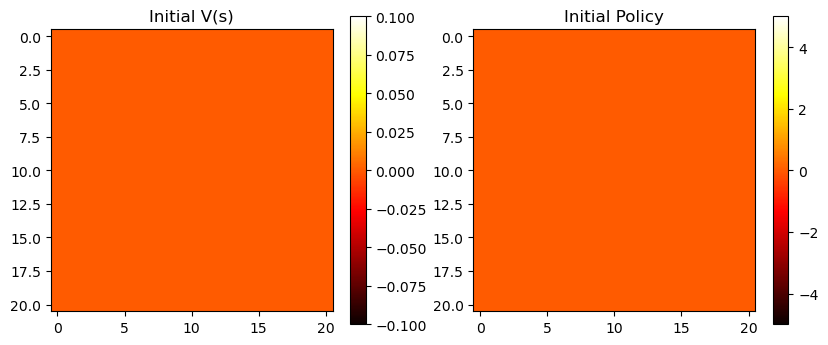

In [10]:
V = np.zeros((21, 21))
pi = np.zeros((21, 21), dtype=int)

show(V, pi, "Initial V(s)", "Initial Policy")

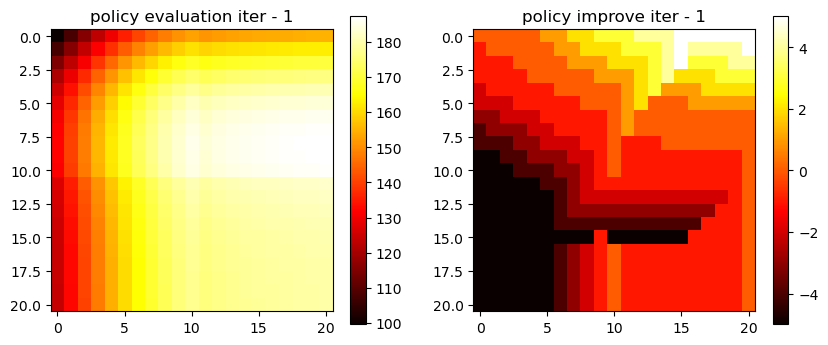

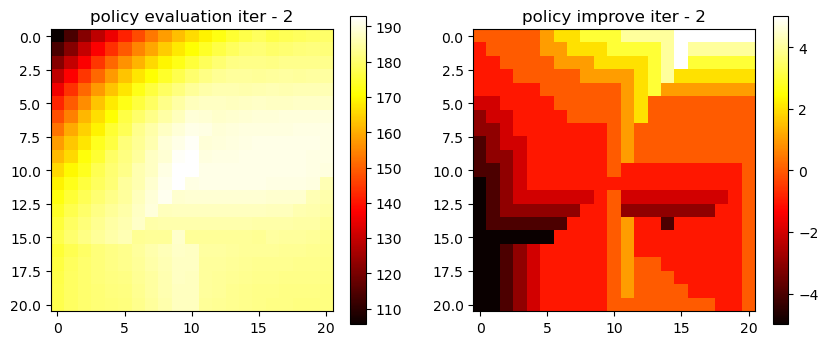

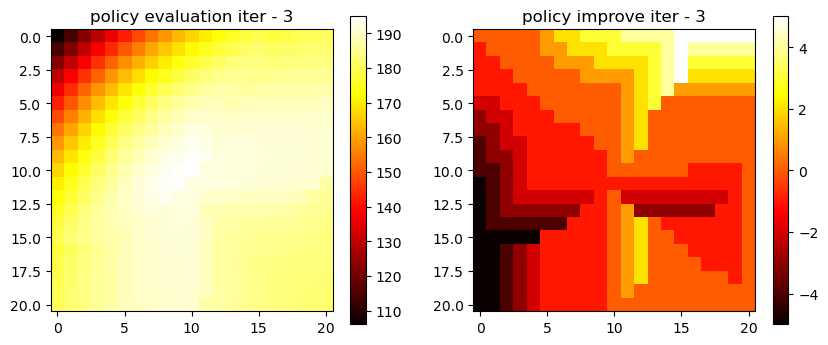

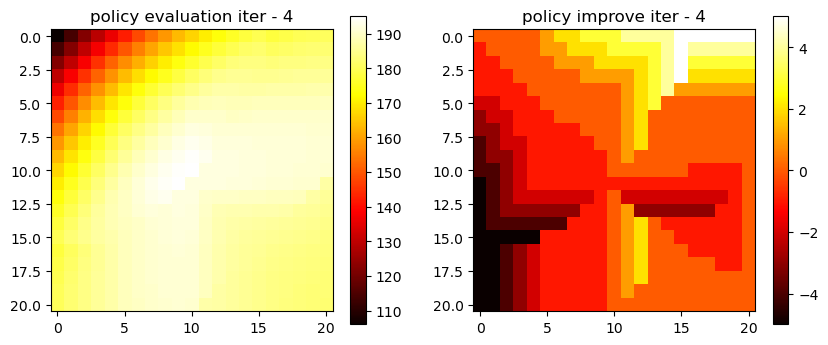

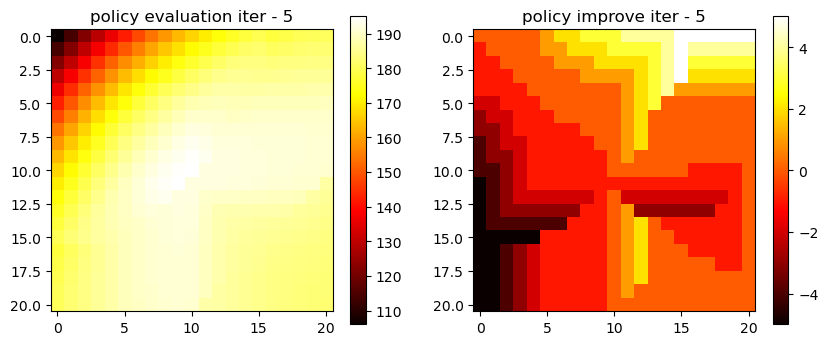

In [11]:
iter = 1
while True:
    V = policy_evaluation(V, pi)
    new_pi, changed = policy_improve(V, pi)
    show(V, new_pi, "policy evaluation iter - "+str(iter), "policy improve iter - "+str(iter))
    if not changed:
        break
    iter += 1
    pi = new_pi